# Problem Statement
__Prepare rules for the movie data sets.__ 
1. Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2. Change the minimum length in apriori algorithm
3. Visulize the obtained rules using different plots

# 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 2. Import Dataset

In [2]:
movie_data = pd.read_csv('my_movies.csv')
movie_data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


# 3. EDA
## 3.1 Initial Understanding

In [3]:
movie_data.shape

(10, 15)

In [4]:
movie_data.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [5]:
movie_data.dtypes

V1               object
V2               object
V3               object
V4               object
V5               object
Sixth Sense       int64
Gladiator         int64
LOTR1             int64
Harry Potter1     int64
Patriot           int64
LOTR2             int64
Harry Potter2     int64
LOTR              int64
Braveheart        int64
Green Mile        int64
dtype: object

## 3.2 Data Preparation

In [6]:
movie_data.drop(['V1','V2','V3','V4','V5'],axis=1,inplace=True)

In [7]:
movie_data

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [8]:
movie_data['Sixth Sense'].value_counts()

1    6
0    4
Name: Sixth Sense, dtype: int64

In [9]:
movie_data['Sixth Sense'].sum()

6

In [10]:
popular_movies = pd.DataFrame()

In [11]:
count = list(movie_data.columns)
popular_movies.insert(loc=0, column='movie_name', value=count)

In [12]:
popular_movies

,movie_name
0,Sixth Sense
1,Gladiator
2,LOTR1
3,Harry Potter1
4,Patriot
5,LOTR2
6,Harry Potter2
7,LOTR
8,Braveheart
9,Green Mile


In [13]:
count[0], len(count),count

('Sixth Sense',
 10,
 ['Sixth Sense',
  'Gladiator',
  'LOTR1',
  'Harry Potter1',
  'Patriot',
  'LOTR2',
  'Harry Potter2',
  'LOTR',
  'Braveheart',
  'Green Mile'])

In [14]:
name = list(movie_data.columns)
c = []
for i in ['Sixth Sense',
  'Gladiator',
  'LOTR1',
  'Harry Potter1',
  'Patriot',
  'LOTR2',
  'Harry Potter2',
  'LOTR',
  'Braveheart',
  'Green Mile']:
    c.append(movie_data[i].sum())
    i = name.index(i)+1

In [15]:
c

[6, 7, 2, 2, 6, 2, 1, 1, 1, 2]

In [16]:
popular_movies.insert(loc=1,column='count',value=c)

In [17]:
popular_movies

,movie_name,count
0,Sixth Sense,6
1,Gladiator,7
2,LOTR1,2
3,Harry Potter1,2
4,Patriot,6
5,LOTR2,2
6,Harry Potter2,1
7,LOTR,1
8,Braveheart,1
9,Green Mile,2


In [18]:
popular_movies.sort_values(by='count',ascending=False,inplace=True)

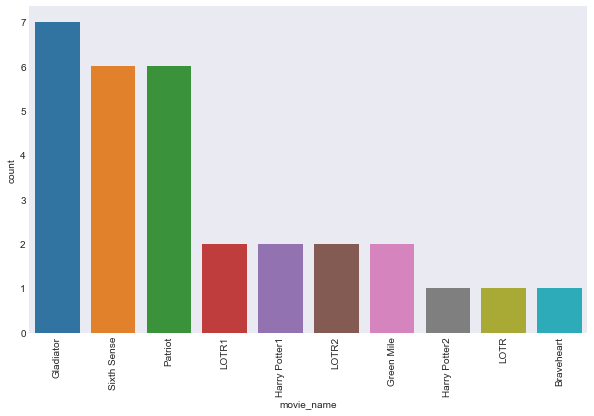

In [19]:
plt.rcParams['figure.figsize'] = (10, 6)
matplotlib.style.use('seaborn-dark')  #https://www.geeksforgeeks.org/style-plots-using-matplotlib/
sns.barplot(x='movie_name',
    y='count',
    data=popular_movies)
plt.xticks(rotation=90)
plt.show()

In [20]:
correlation = movie_data.corr()

<AxesSubplot:>

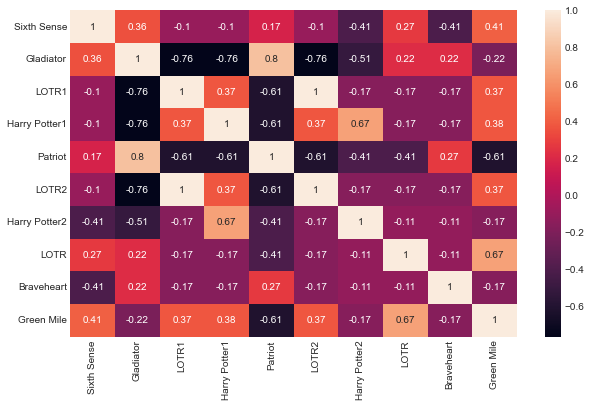

In [21]:
sns.heatmap(correlation,annot=True) #annot gives number(corr) in boxes.

# 4. Model Building

In [22]:
frequent_movies = apriori(movie_data,min_support=0.5,use_colnames=True)
frequent_movies

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.6,"(Gladiator, Patriot)"


In [23]:
asso_rules = association_rules(frequent_movies, metric='confidence',min_threshold=0.8)
asso_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf


Text(0, 0.5, 'confidence')

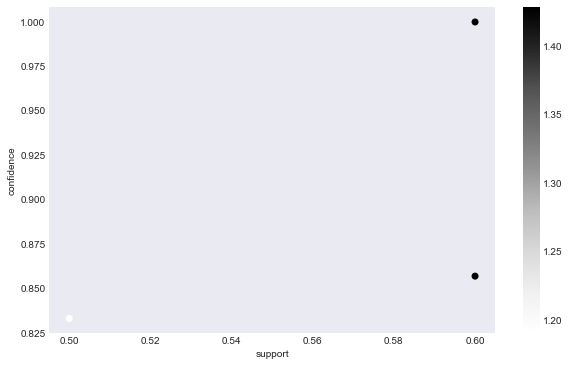

In [24]:
support    = asso_rules["support"]
confidence = asso_rules["confidence"]
lift       = asso_rules["lift"]

# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111, projection = '3d')
# ax1.scatter(support,confidence,lift)
# ax1.set_xlabel("support")
# ax1.set_ylabel("confidence")
# ax1.set_zlabel("lift")

plt.scatter(support,confidence, c =lift)
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")

In [25]:
# here, number of rules is very less, so this is not going to be useful.

#### Let us mininmize both support and min_threshhold in confidence:

In [26]:
frequent_movies = apriori(movie_data,min_support=0.05,use_colnames=True)

asso_rules_1 = association_rules(frequent_movies, metric='confidence',min_threshold=0.5)
asso_rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
211,"(LOTR2, Green Mile)","(LOTR1, Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
212,(LOTR1),"(LOTR2, Harry Potter1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
213,(Harry Potter1),"(LOTR1, LOTR2, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
214,(Green Mile),"(LOTR1, LOTR2, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


Text(0.5, 0, 'lift')

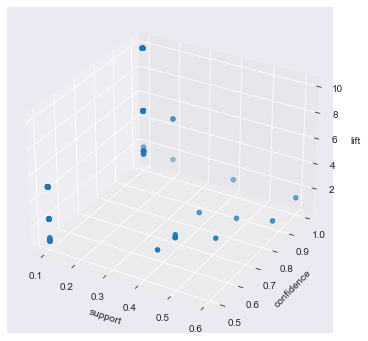

In [27]:
support    = asso_rules_1["support"]
confidence = asso_rules_1["confidence"]
lift       = asso_rules_1["lift"]

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

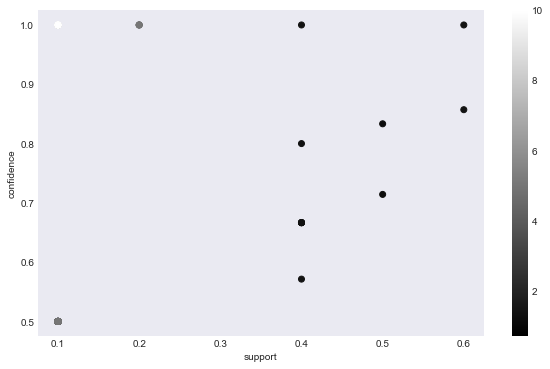

In [28]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")

In [29]:
frequent_movies = apriori(movie_data,min_support=0.005,use_colnames=True)

asso_rules_2 = association_rules(frequent_movies, metric='confidence',min_threshold=0.45)
asso_rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
211,"(LOTR2, Green Mile)","(LOTR1, Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
212,(LOTR1),"(LOTR2, Harry Potter1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
213,(Harry Potter1),"(LOTR1, LOTR2, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
214,(Green Mile),"(LOTR1, LOTR2, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


In [32]:
asso_rules_2 = asso_rules_2[asso_rules_2['lift']>0.8]

In [33]:
result = asso_rules_2.drop(['antecedent support','consequent support','leverage','conviction'],axis=1)
result

,antecedents,consequents,support,confidence,lift
0,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476
1,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
4,(Sixth Sense),(Patriot),0.4,0.666667,1.111111
5,(Patriot),(Sixth Sense),0.4,0.666667,1.111111
7,(LOTR),(Sixth Sense),0.1,1.000000,1.666667
...,...,...,...,...,...
211,"(LOTR2, Green Mile)","(LOTR1, Harry Potter1, Sixth Sense)",0.1,1.000000,10.000000
212,(LOTR1),"(LOTR2, Harry Potter1, Sixth Sense, Green Mile)",0.1,0.500000,5.000000
213,(Harry Potter1),"(LOTR1, LOTR2, Sixth Sense, Green Mile)",0.1,0.500000,5.000000
214,(Green Mile),"(LOTR1, LOTR2, Harry Potter1, Sixth Sense)",0.1,0.500000,5.000000


In [34]:
result.sort_values(by='lift',ascending=False)

,antecedents,consequents,support,confidence,lift
179,"(LOTR1, Green Mile)","(LOTR2, Harry Potter1)",0.1,1.000000,10.000000
139,"(LOTR1, Sixth Sense)","(Harry Potter1, Green Mile)",0.1,1.000000,10.000000
201,"(LOTR2, Harry Potter1, Green Mile)","(LOTR1, Sixth Sense)",0.1,1.000000,10.000000
200,"(LOTR2, Sixth Sense, Green Mile)","(LOTR1, Harry Potter1)",0.1,1.000000,10.000000
199,"(LOTR2, Harry Potter1, Sixth Sense)","(LOTR1, Green Mile)",0.1,1.000000,10.000000
...,...,...,...,...,...
0,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476
32,"(Gladiator, Patriot)",(Sixth Sense),0.4,0.666667,1.111111
35,(Sixth Sense),"(Gladiator, Patriot)",0.4,0.666667,1.111111
5,(Patriot),(Sixth Sense),0.4,0.666667,1.111111


Text(0.5, 0, 'lift')

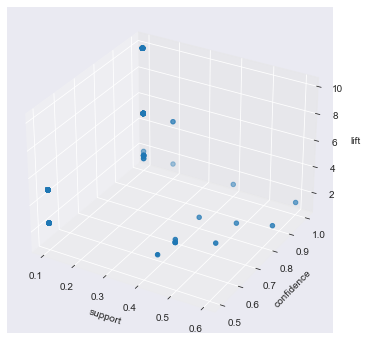

In [35]:
support    = asso_rules_2["support"]
confidence = asso_rules_2["confidence"]
lift       = asso_rules_2["lift"]

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

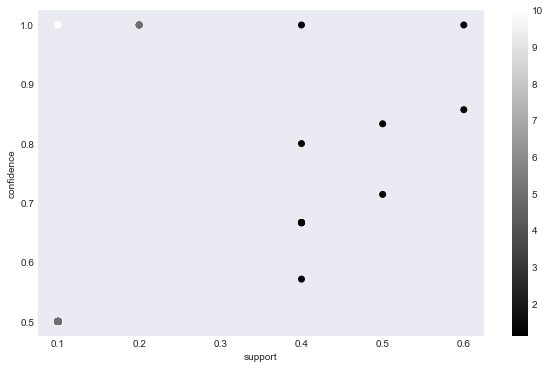

In [36]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")

In [37]:
frequent_movies = apriori(movie_data,min_support=0.005,use_colnames=True)

asso_rules_3 = association_rules(frequent_movies, metric='confidence',min_threshold=0.4)
asso_rules_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
211,"(LOTR2, Green Mile)","(LOTR1, Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
212,(LOTR1),"(LOTR2, Harry Potter1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
213,(Harry Potter1),"(LOTR1, LOTR2, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
214,(Green Mile),"(LOTR1, LOTR2, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


In [38]:
asso_rules_3 = asso_rules_3[asso_rules_3['lift']>0.8]
result       = asso_rules_3.drop(['antecedent support','consequent support','leverage','conviction'],axis=1)
result

,antecedents,consequents,support,confidence,lift
0,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476
1,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
2,(LOTR1),(Sixth Sense),0.1,0.500000,0.833333
3,(Harry Potter1),(Sixth Sense),0.1,0.500000,0.833333
4,(Sixth Sense),(Patriot),0.4,0.666667,1.111111
...,...,...,...,...,...
211,"(LOTR2, Green Mile)","(LOTR1, Harry Potter1, Sixth Sense)",0.1,1.000000,10.000000
212,(LOTR1),"(LOTR2, Harry Potter1, Sixth Sense, Green Mile)",0.1,0.500000,5.000000
213,(Harry Potter1),"(LOTR1, LOTR2, Sixth Sense, Green Mile)",0.1,0.500000,5.000000
214,(Green Mile),"(LOTR1, LOTR2, Harry Potter1, Sixth Sense)",0.1,0.500000,5.000000


Text(0.5, 0, 'lift')

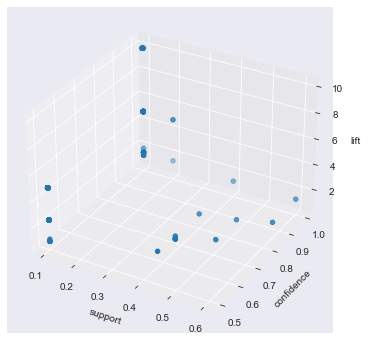

In [39]:
support    = asso_rules_3["support"]
confidence = asso_rules_3["confidence"]
lift       = asso_rules_3["lift"]

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

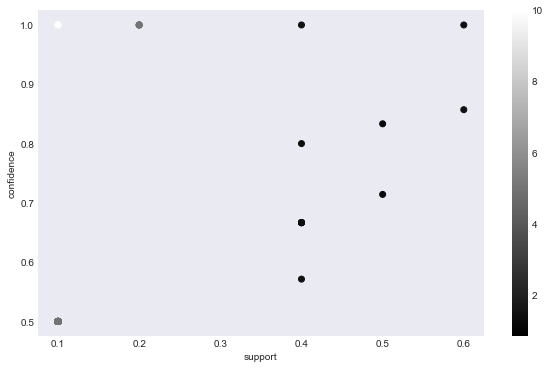

In [40]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")

In [41]:
frequent_movies = apriori(movie_data,min_support=0.005,use_colnames=True)

asso_rules_4 = association_rules(frequent_movies, metric='confidence',min_threshold=0.3)
asso_rules_4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
212,"(LOTR2, Green Mile)","(LOTR1, Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
213,(LOTR1),"(LOTR2, Harry Potter1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
214,(Harry Potter1),"(LOTR1, LOTR2, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
215,(Green Mile),"(LOTR1, LOTR2, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


Text(0.5, 0, 'lift')

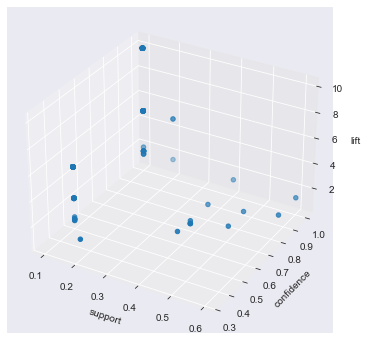

In [43]:
support    = asso_rules_4["support"]
confidence = asso_rules_4["confidence"]
lift       = asso_rules_4["lift"]

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

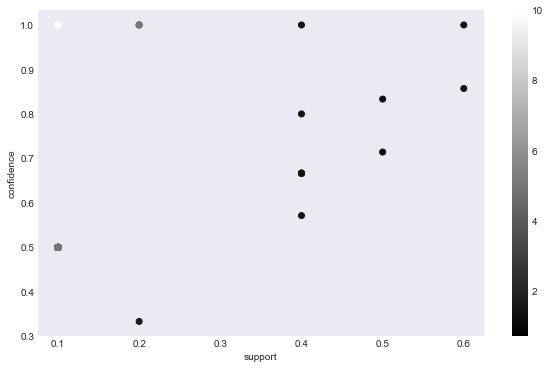

In [44]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")

(250, 9)


Text(0.5, 0, 'lift')

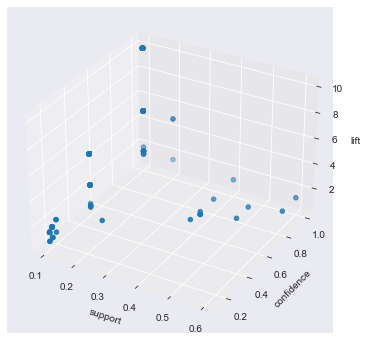

In [45]:
frequent_movies = apriori(movie_data,min_support=0.005,use_colnames=True)

asso_rules_4 = association_rules(frequent_movies, metric='confidence',min_threshold=0.04)
print(asso_rules_4.shape)

support    = asso_rules_4["support"]
confidence = asso_rules_4["confidence"]
lift       = asso_rules_4["lift"]

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

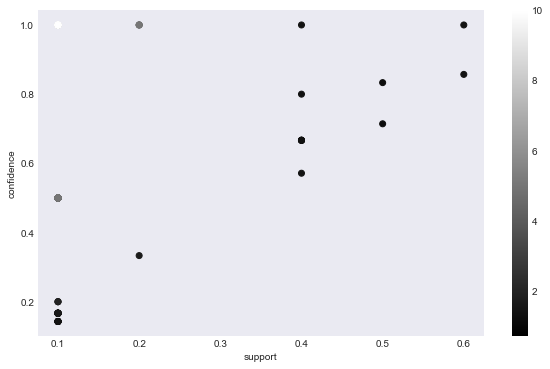

In [46]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")

In [50]:
frequent_movies = apriori(movie_data,min_support=0.004,use_colnames=True)

asso_rules_5 = association_rules(frequent_movies, metric='confidence',min_threshold=0.04)
asso_rules_5.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
212,"(LOTR1, Green Mile)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
225,"(LOTR1, Harry Potter1, Sixth Sense)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
213,"(LOTR2, Harry Potter1)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
211,"(LOTR1, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
139,"(Sixth Sense, Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
64,"(LOTR1, LOTR2)",(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.800000
21,(Green Mile),(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
55,(Gladiator),"(Sixth Sense, Green Mile)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
54,"(Sixth Sense, Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000


Text(0.5, 0, 'lift')

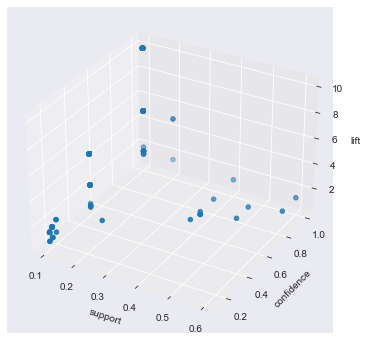

In [51]:
support    = asso_rules_5["support"]
confidence = asso_rules_5["confidence"]
lift       = asso_rules_5["lift"]

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

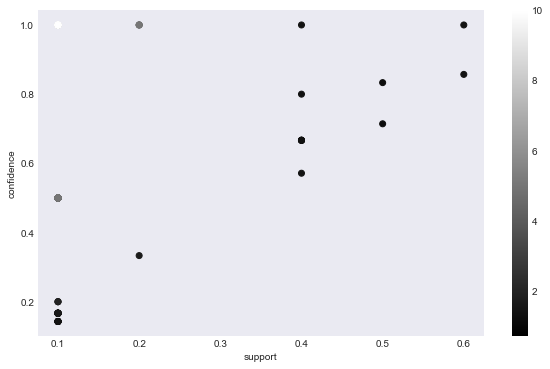

In [52]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")